# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech
* Nama : Rahmat Hidayat
* Email: hrahmat950@gmail.com
* ID Dicoding : rahmat9

## Persiapan Library yang dibutuhkan

In [15]:
import os
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## Directory penyimpanan model

In [16]:
MODEL_DIR = "model"
os.makedirs(MODEL_DIR, exist_ok=True)

## Menyiapkan data yang akan digunakan - Data Understanding

In [17]:
def load_data(csv_path):
    df = pd.read_csv(csv_path)
    print("\n🔍 Data Overview:")
    print(df.info())
    print("\n🧐 First 5 rows:")
    print(df.head())
    return df

## Data Preparation / Preprocessing

In [18]:
def prepare_data(df):
    df_cleaned = df.dropna(subset=['Attrition'])
    
    # Pilih fitur yang relevan
    features = df_cleaned[['MonthlyIncome', 'OverTime', 'JobSatisfaction']]
    target = df_cleaned['Attrition']
    
    # Encode categorical variables
    le = LabelEncoder()
    features['OverTime'] = le.fit_transform(features['OverTime'])
    
    # Scale numerical features
    scaler = StandardScaler()
    features[['MonthlyIncome', 'JobSatisfaction']] = scaler.fit_transform(
        features[['MonthlyIncome', 'JobSatisfaction']]
    )
    
    return features, target, scaler

## Modeling

In [19]:
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    return model, X_test, y_test

## Evaluation

In [20]:

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("\n📊 Model Performance:")
    print(classification_report(y_test, y_pred))

def plot_importance(model, feature_names):
    importances = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importances)
    plt.title('Feature Importance')
    plt.show()

## Simpan dan Muat Model

In [21]:

def save_model(model, scaler):
    joblib.dump(model, os.path.join(MODEL_DIR, "attrition_model.pkl"))
    joblib.dump(scaler, os.path.join(MODEL_DIR, "scaler.pkl"))
    print("\n✅ Model dan scaler berhasil disimpan di folder 'model/'")

def load_model():
    model = joblib.load(os.path.join(MODEL_DIR, "attrition_model.pkl"))
    scaler = joblib.load(os.path.join(MODEL_DIR, "scaler.pkl"))
    print("\n✅ Model dan scaler berhasil dimuat kembali")
    return model, scaler

## Eksekusi Utama


🔍 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int

C:\Users\hrahm\AppData\Local\Temp\ipykernel_10888\3787878882.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['OverTime'] = le.fit_transform(features['OverTime'])
C:\Users\hrahm\AppData\Local\Temp\ipykernel_10888\3787878882.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[['MonthlyIncome', 'JobSatisfaction']] = scaler.fit_transform(



✅ Model dan scaler berhasil dimuat kembali


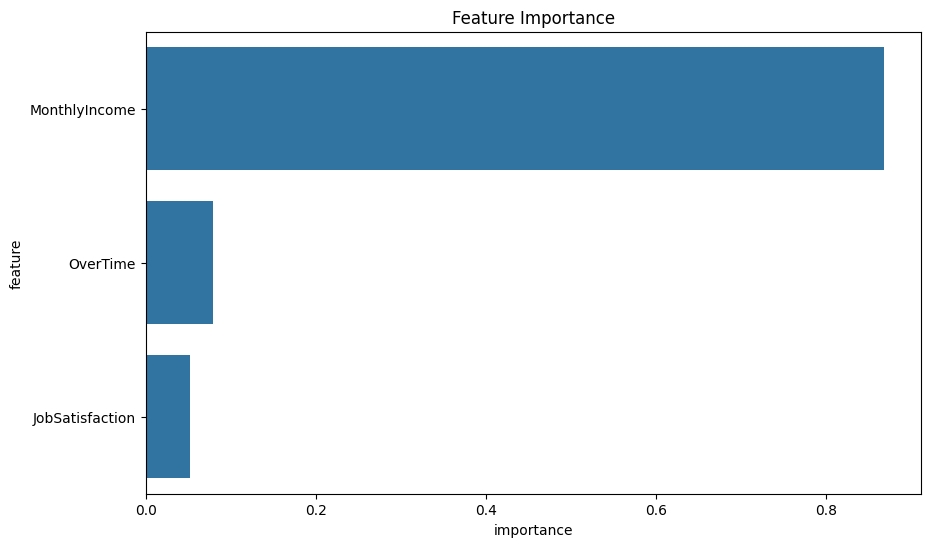

In [22]:
if __name__ == "__main__":
    df = load_data('employee_data.csv')
    X, y, scaler = prepare_data(df)
    model, X_test, y_test = train_model(X, y)
    evaluate_model(model, X_test, y_test)
    save_model(model, scaler)
    model, scaler = load_model()
    plot_importance(model, X.columns)

C:\Users\hrahm\AppData\Local\Temp\ipykernel_10888\789082626.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['JobSatisfaction'], palette="viridis")


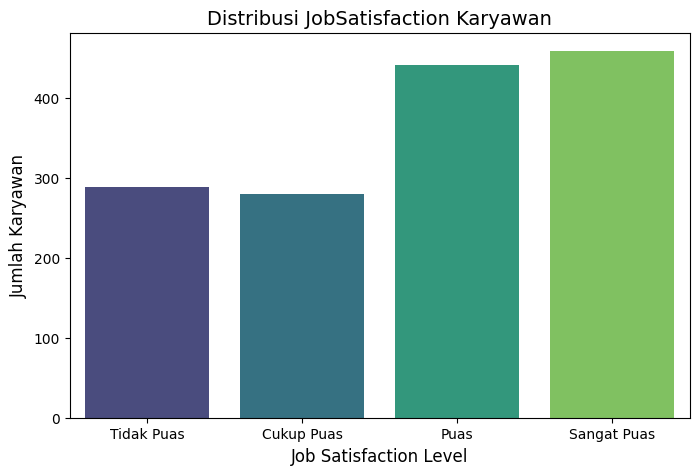

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('employee_data.csv')

# Plot distribusi JobSatisfaction
plt.figure(figsize=(8, 5))
sns.countplot(x=df['JobSatisfaction'], palette="viridis")

# Judul dan label
plt.title("Distribusi JobSatisfaction Karyawan", fontsize=14)
plt.xlabel("Job Satisfaction Level", fontsize=12)
plt.ylabel("Jumlah Karyawan", fontsize=12)
plt.xticks([0, 1, 2, 3], ["Tidak Puas", "Cukup Puas", "Puas", "Sangat Puas"])
plt.show()

C:\Users\hrahm\AppData\Local\Temp\ipykernel_10888\826491167.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['JobSatisfaction'], palette="viridis")


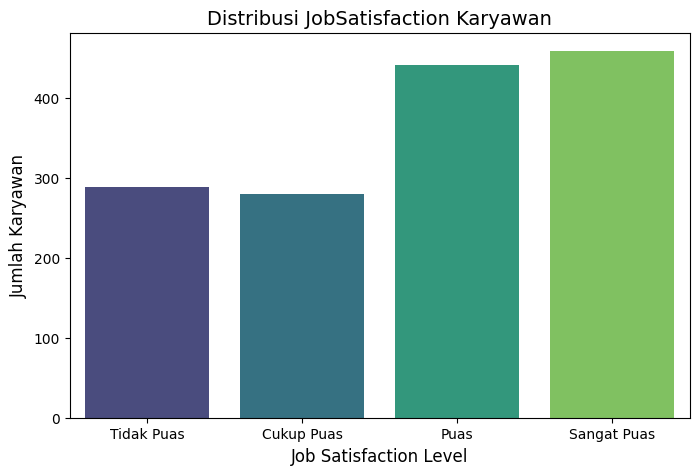

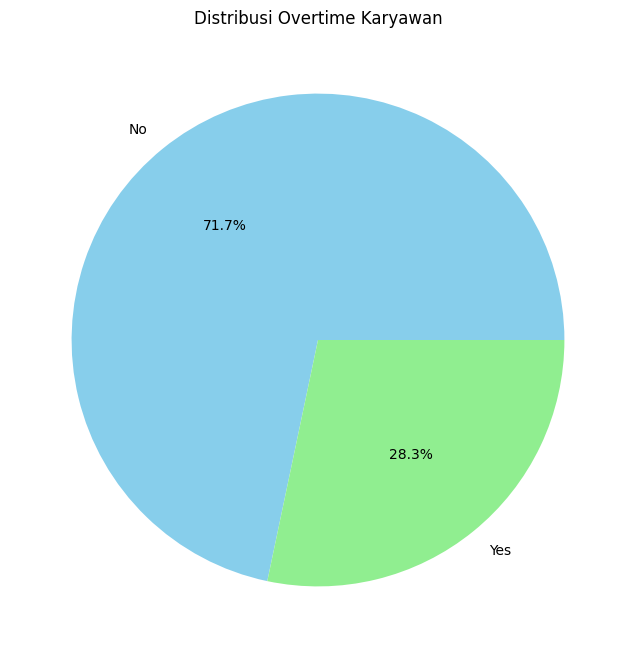

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('employee_data.csv')

# Plot distribusi JobSatisfaction
plt.figure(figsize=(8, 5))
sns.countplot(x=df['JobSatisfaction'], palette="viridis")

# Judul dan label
plt.title("Distribusi JobSatisfaction Karyawan", fontsize=14)
plt.xlabel("Job Satisfaction Level", fontsize=12)
plt.ylabel("Jumlah Karyawan", fontsize=12)
plt.xticks([0, 1, 2, 3], ["Tidak Puas", "Cukup Puas", "Puas", "Sangat Puas"])
plt.show()

# Plot distribusi OverTime as pie chart
plt.figure(figsize=(8, 8))
df['OverTime'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribusi Overtime Karyawan')
plt.ylabel('')  # Hide the y-label
plt.show()

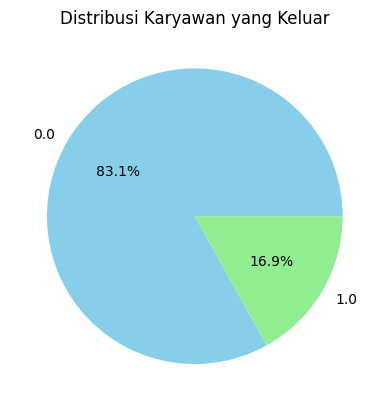

In [25]:
df['Attrition'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribusi Karyawan yang Keluar')
plt.ylabel('')  # Hide the y-label
plt.show()